# Example 5.3 : $\int_0^\infty dx~ e^{-x^2}$ by various change of variables

In [1]:
import numpy as np
from math import exp, sqrt, pi, cos, tan
import matplotlib.pyplot as plt
from utils import gaussxw

## Task
Calculate $I=\int_0^\infty dx~ e^{-x^2}$ by the following three methods:
 - trapezoid
 - trapezoid + euler-maclauring correction $\frac{1}{12}h^2(f'(b)-f'(a))$
 - Gaussian quadrature

Moreover, use the following two functions for change of variable to change the infinite integral domain to finite one:  
 - $x=z/(1-z)$
 - $x=\tan z$

That is, we test 3 integration methods and 2 functions for the change of the variable, so in all 3x2=6 patterns to test.  
We first consider each of three methods for the case of $x=z/(1-z)$, and then for the case of $x=\tan z$.  

For reference, the exact value of the integral is $\sqrt{\pi}/2$, which is 0.886226925452758. 

In [2]:
print(sqrt(pi)/2)

0.8862269254527579


In [3]:
def trapezoid(f, a, b, N):
    "returns integral value of f from a to b using trapezoid approximation"
    assert a<b
    h = (b-a)/N
    result = 0.
    for k in range(1,N+1):
        xk = a + h*k
        result += h*f(xk)
    result += 0.5*h*(f(a) - f(b))
    return result

def euler_maclaurin(f, df, a, b, N):
    assert a<b
    h = (b-a)/N  
    correction = 1/12*h*h*(df(a) - df(b))
    return trapezoid(f, a, b, N) + correction

def gauss(f, a, b, N):
    "returns integral value of f from a to b using Gaussian quadrature"
    assert a<b
    x, w = gaussxw.gaussxwab(N, a, b)
    result = 0.
    for k in range(N):
        result += w[k] * f(x[k])
    return float(result)

### $x=z/(1-z)$  
First we consider the case of using transformation $x=z/(1-z)$.  In this case, since $dx = dz/(1-z)^2$,   
$I=\int_0^\infty dx~ e^{-x^2} = \int_0^1 dz~ g(z)$  with $g(z)=\frac{1}{(1-z)^2}\exp\left( - \frac{z^2}{(1-z)^2} \right)$.  
The derivative is $g'(z)=2\frac{z^3-3z+1}{(1-z)^5}\exp(-\frac{z^2}{(1-z)^2})$, which we use for euler-maclaurin correction.   

In [4]:
def g(z):
    assert 0<=z<=1
    return exp(- z**2/(1-z)**2) / (1-z)**2 if z<1. else 0.  # we treat the case of z=1 separately to avoid zero division 

def dg(z):
    return exp(-z**2/(1-z)**2)*2*(z**2-3*z+1)/(1-z)**5 if z<1. else 0.  # we treat the case of z=1 separately to avoid zero division 

print(f"true value                 : {sqrt(pi)/2}")
value_tra = trapezoid(g, 0, 1, N=100)
print(f"integral value by trapezoid      : {value_tra}, its relative error is {abs(value_tra-sqrt(pi)/2)/(sqrt(pi)/2)}")
value_em = euler_maclaurin(g, dg, 0, 1, N=100)
print(f"integral value by euler-maclaurin: {value_em}, its relative error is {abs(value_em-sqrt(pi)/2)/(sqrt(pi)/2)}")
value_gau = gauss(g, 0, 1, N=100)
print(f"integral value by gauss          : {value_gau}, its relative error is {abs(value_gau-sqrt(pi)/2)/(sqrt(pi)/2)}")

true value                 : 0.8862269254527579
integral value by trapezoid      : 0.8862102587861348, its relative error is 1.8806319402481906e-05
integral value by euler-maclaurin: 0.8862269254528015, its relative error is 4.9107899247218366e-14
integral value by gauss          : 0.886226925452758, its relative error is 1.2527525318167949e-16


Thus, we see that the Gauss quadrature is the most accurate, the trapezoid+euler-maclauin is the second most accurate, and the trapezoid alone the least accurate, as generally expected.  

### $x=\tan(z)$    
Next we consider the case of using transformation $x=\tan(z)$.  In this case, since $dx = dz/\cos^2(z)$,   
$I=\int_0^\infty dx~ e^{-x^2} = \int_0^{\pi/2} dz~ g(z)$  with $g(z)=\frac{1}{\cos^2(z)}\exp(-\tan^2(z))$.  
The derivative is $g'(z)=-2\frac{\tan^3(z)}{\cos^2(z)}\exp(-\tan^2(z))$, which we use for euler-maclaurin correction.   

In [5]:
def g(z):
    assert 0<=z<=pi/2
    eps = np.finfo(np.float64).eps
    return exp(-tan(z)**2) / cos(z)**2 if z<pi/2-eps else 0.  # we treat the case of z=pi/2 separately to avoid zero division 

def dg(z):
    assert 0<=z<=pi/2
    eps = np.finfo(np.float64).eps
    return -2*exp(-tan(z)**2) * tan(z)**3 / cos(z)**2 if z<pi/2-eps else 0.  # we treat the case of z=pi/2 separately to avoid zero division 

print(f"true value                 : {sqrt(pi)/2}")
value_tra = trapezoid(g, 0, 1, N=100)
print(f"integral value by trapezoid      : {value_tra}, its relative error is {abs(value_tra-sqrt(pi)/2)/(sqrt(pi)/2)}")
value_em = euler_maclaurin(g, dg, 0, 1, N=100)
print(f"integral value by euler-maclaurin: {value_em}, its relative error is {abs(value_em-sqrt(pi)/2)/(sqrt(pi)/2)}")
value_gau = gauss(g, 0, 1, N=100)
print(f"integral value by gauss          : {value_gau}, its relative error is {abs(value_gau-sqrt(pi)/2)/(sqrt(pi)/2)}")

# Increase N from 100 to 1000
print("----Increase N from 100 to 1000----")
value_tra = trapezoid(g, 0, 1, N=1000)
print(f"integral value by trapezoid      : {value_tra}, its relative error is {abs(value_tra-sqrt(pi)/2)/(sqrt(pi)/2)}")
value_em = euler_maclaurin(g, dg, 0, 1, N=1000)
print(f"integral value by euler-maclaurin: {value_em}, its relative error is {abs(value_em-sqrt(pi)/2)/(sqrt(pi)/2)}")
value_gau = gauss(g, 0, 1, N=1000)
print(f"integral value by gauss          : {value_gau}, its relative error is {abs(value_gau-sqrt(pi)/2)/(sqrt(pi)/2)}")

true value                 : 0.8862269254527579
integral value by trapezoid      : 0.8617218398274927, its relative error is 0.027651028107440977
integral value by euler-maclaurin: 0.8617409116695426, its relative error is 0.027629507838193786
integral value by gauss          : 0.861740913033365, its relative error is 0.027629506299285015
----Increase N from 100 to 1000----
integral value by trapezoid      : 0.8617407223148087, its relative error is 0.0276297215021307
integral value by euler-maclaurin: 0.8617409130332292, its relative error is 0.027629506299438226
integral value by gauss          : 0.8617409130333664, its relative error is 0.027629506299283384


In this case, the result has the following characteristics:
 - it is overall not accurate (with a few percent relative error !)
 - different integral formulas do not return substantially different result
 - increasing N does not improve the result

## Discussion

We have seen that while using the transformation function $x=z/(1-z)$ gives a result with good accuracy, using the other one $x=\tan(z)$ gives a poor result with some weird characteristics.  

Why?

Whether it may help or not, let us compare the transformation functions by plotting:  

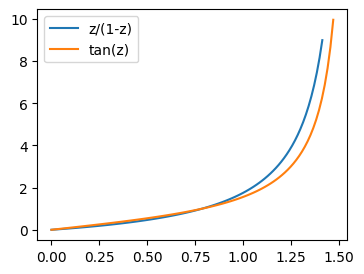

In [6]:
z = np.linspace(0, 1-0.1, 100)
x = z/(1-z)
z2 = np.linspace(0, pi/2-0.1, 100)
x2 = np.tan(z2)
plt.figure(figsize=(4, 3))
plt.plot(pi/2*z, x, label='z/(1-z)')  # to make comparison easier, we elongate the domain [0,1] to [0, pi/2]
plt.plot(z2, x2, label='tan(z)')
plt.legend()
plt.show()

They do not seem to have significant difference.  

Next, let us plot the integrands after transformation of variable, that is, $g(z)=\frac{1}{(1-z)^2}\exp\left( - \frac{z^2}{(1-z)^2} \right)$ in the case of $x=z/(1-z)$ and $g(z)=\frac{1}{\cos^2(z)}\exp(-\tan^2(z))$ in the case of $x=\tan(z)$: 

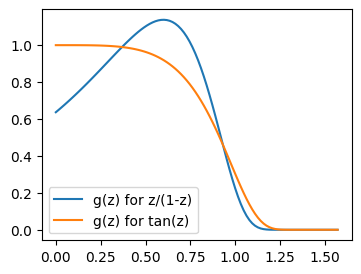

In [7]:
z = np.linspace(0, 1-0.0001, 100)
g = 1/(1-z)**2 * np.exp(-z**2/(1-z)**2)
z2 = np.linspace(0, pi/2, 100)
g2 = 1/np.cos(z2)**2 * np.exp(-np.tan(z2)**2)
plt.figure(figsize=(4, 3))
plt.plot(pi/2*z,g*2/pi, label='g(z) for z/(1-z)')  # to make comparison easier, we elongate the domain [0,1] to [0, pi/2], and instead shrink the value by 2/pi times
plt.plot(z2, g2, label='g(z) for tan(z)')
plt.legend()
plt.show()

We see that in the case of $x=z/(1-z)$ the integrand first increases and then decreases, while in the case of $x=\tan(z)$ the integrand monotonically decreases.  
(The original integrand $\exp(-x^2)$ is a monotonically decreasing function, but the multiplication of the integral density $1/(1-z)^2$ and $1/\cos^2(z)$ gives different behavior for the two cases.)

Although I cannot find any clear reasons for the difference in numerical accuracy of $I=\int_0^\infty dx~e^{-x^2}$ for the two cases using $x=z/(1-z)$ and using$x=\tan(z)$,  my guesses are as follows.
 - Difference in accumulation of errors: As seen above, the integrand in the case of $x=z/(1-z)$ first increases and then decreases, while in the case of $x=\tan(z)$ monotonically decreases.  Accumulation of error might be stronger if an integrand is a monotonically increasing or decreasing function.
 - Error in trigonometric function:  Numerical accuracy of trigonometric functions such as $\sin, \cos, \tan$ may be worse than rational functions such as $1/(1-z)$.  If this is the case, it would explain weird characteristics of the result in the case of $x=\tan(z)$, that is, different integral formulas do not return substantially different result, and, increasing N does not improve the result.  They are because the numerical inaccuracy does not come from integration approximation formulas, but simply from using trigonometic functions.  Moreover, this (supposedly) error coming from trigonometric functions is greatly amplified by exponential function, like in $\exp(-\tan^2(z))$.   

I feel that the second guess is on the right track (even if the first guess is right, it will not be the main reason for numerical inaccuracy this time).  
If it is right, the lesson is that __Avoid using trigonometric functions especially when they are inside exponential functions__.

TO DO : find some examples which support my guess (for example, use $x=\tan(z)$ for some integrands which do not involve exponential functions).  

In [8]:
print(f"{tan(pi/4):.20f}")

0.99999999999999988898


Hmm... I said trigonometric functions may be inaccurate, but as long as this example it is fairly accurate...